___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
from random import sample
from numpy.random import uniform
from termcolor import colored

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import sklearn

from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px
import plotly.io as pio
import plotly
pio.renderers.default = "jupyterlab"

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
plt.rcParams["figure.figsize"] = (8,5)
pd.set_option('display.max_rows', 500)
# pd.set_option('display.float_format', '{:.3f}'.format)
pd.options.display.float_format = '{:.3f}'.format

In [7]:
print(f"pandas = {pd.__version__}\n"
      f"numpy = {np.__version__}\n"
      f"seaborn = {sns.__version__}\n"
      f"plotly = {plotly.__version__}\n"
      f"scikit-learn = {sklearn.__version__}")

pandas = 2.1.1
numpy = 1.26.1
seaborn = 0.13.0
plotly = 5.17.0
scikit-learn = 1.3.1


#### Load Dataset

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [9]:
df.columns = ['id', 'gender', 'age', 'income', 'score']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   gender  200 non-null    object
 2   age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.shape

(200, 5)

In [11]:
df.duplicated().sum()

0

In [12]:
# df.drop(columns = ['id'], inplace= True)
df.drop('id', axis= 1).describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
income,200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
score,200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [13]:
df['gender'].value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





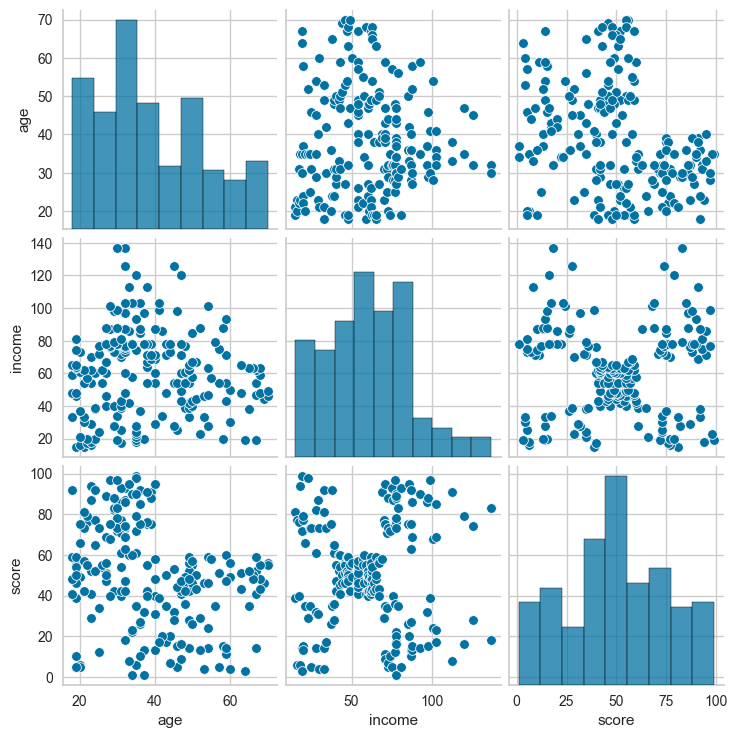

In [14]:
sns.pairplot(df.drop('id', axis= 1));

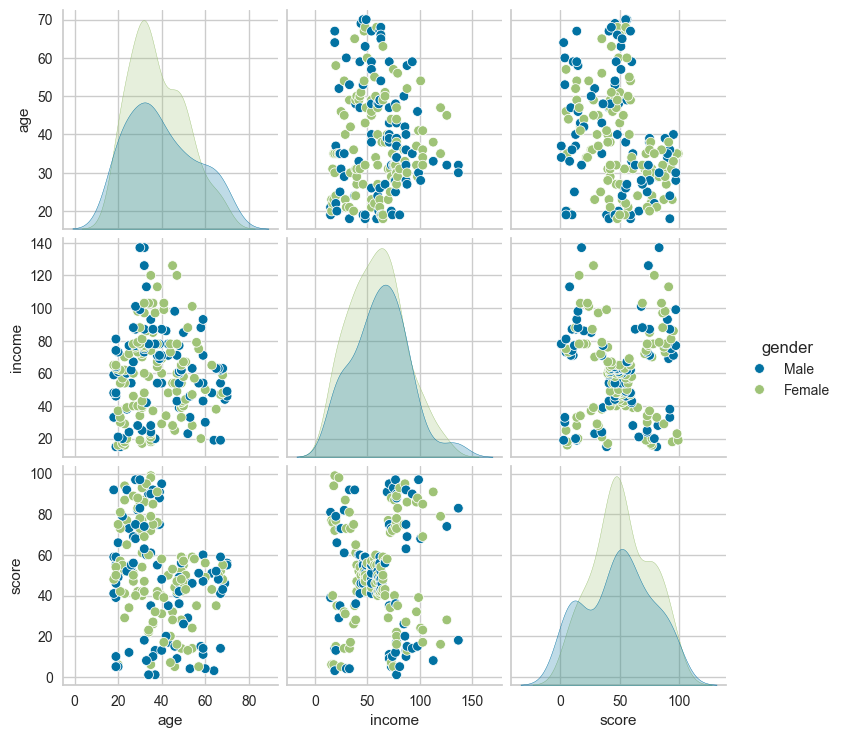

In [15]:
sns.pairplot(df.drop('id', axis= 1), hue = 'gender');

In [16]:
# df.drop('id', axis= 1).select_dtypes(include=['int64', 'float64']).corr()
df.drop(['id', 'gender'], axis= 1).corr()

,age,income,score
age,1.000,-0.012,-0.327
income,-0.012,1.000,0.010
score,-0.327,0.010,1.000


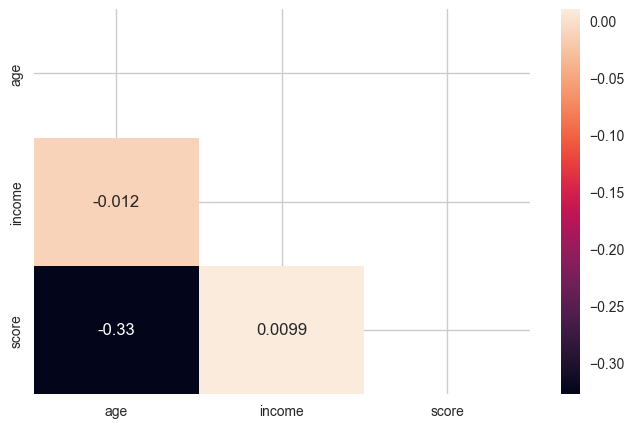

In [17]:
relation =df.drop(['id', 'gender'], axis= 1).corr()
sns.heatmap(relation, annot=True, mask = np.triu(np.ones_like(relation, dtype=bool)));

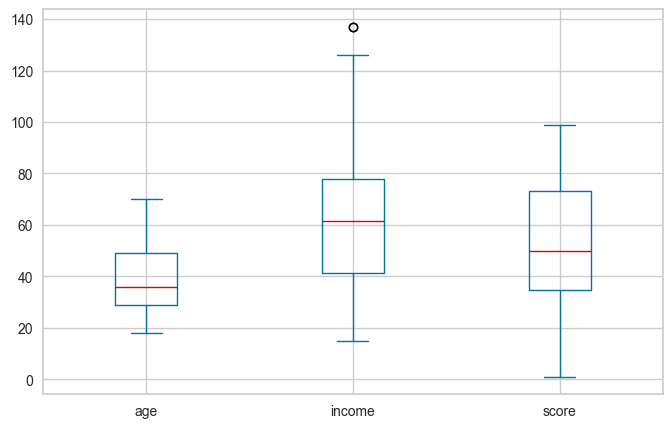

In [18]:
df.drop('id', axis= 1).plot(kind='box');


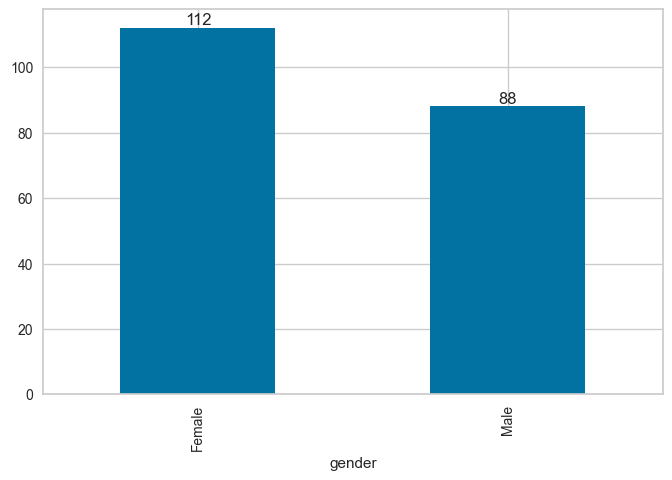

In [19]:
# df.plot.bar(x= 'gender');
# plt.bar(df['gender'].value_counts().index,df['gender'].value_counts() );
# gender_counts = df['gender'].value_counts()
# plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%');
# df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
gender_counts = df['gender'].value_counts()
ax = gender_counts.plot.bar();
for i, v in enumerate(gender_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

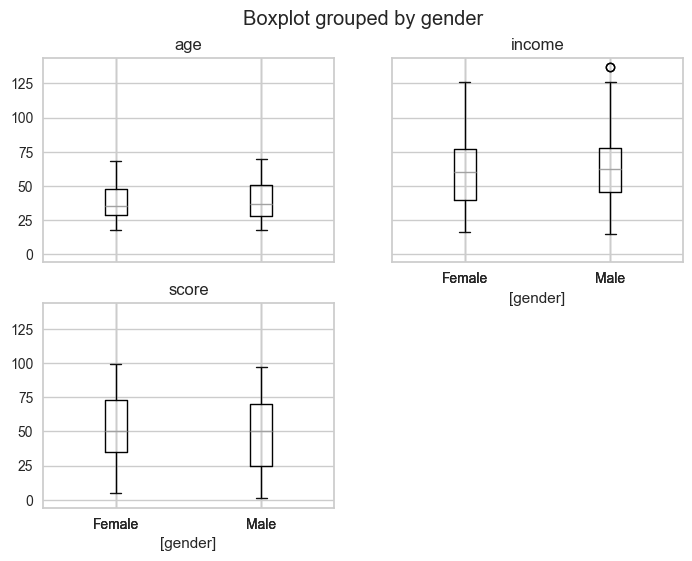

In [20]:
# df.drop('id', axis= 1).plot(kind='box', hue = 'gender');
df.drop('id', axis= 1).boxplot(by='gender', figsize=(8, 6));

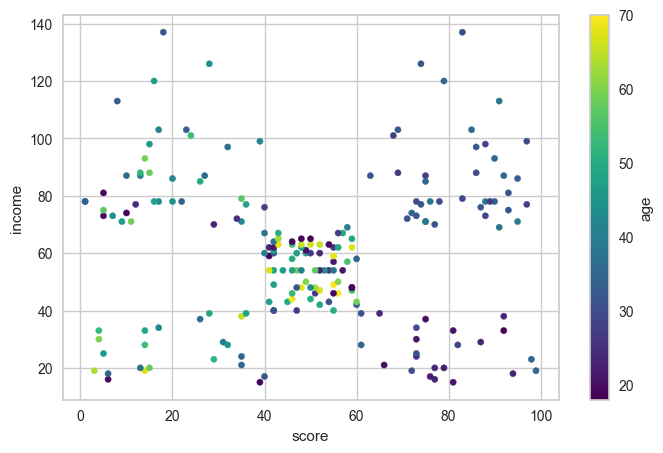

In [21]:
df.plot.scatter(x='score', y='income', c='age', colormap='viridis', s= 20);

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [22]:
scaler = StandardScaler()
X_as = df[['age', 'score']]
# X_as_scaled = scaler.fit_transform(X_as)
X_as_scaled = pd.DataFrame(scaler.fit_transform(X_as ), columns=['age', 'score'])

In [23]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)    
    return H

In [24]:
print(f'Feature: Age & Score Hopkins:          { np.mean([hopkins(X_as, 1) for i in range(10)]) :<.3f}')
print(f'Feature: Age & Score (scaled) Hopkins: {np.mean([hopkins(X_as_scaled, 1) for i in range(10)]):<.3f}')

Feature: Age & Score Hopkins:          0.704
Feature: Age & Score (scaled) Hopkins: 0.696


#### *ii. Determine optimal number of clusters*

In [25]:
def inertia_distortion(X, title):
    ssd = []
    K = range(2, 15)
    
    for k in K:
        model = KMeans(n_clusters = k, random_state=42)
        model.fit(X)
        ssd.append(model.inertia_)

    K = range(2, 15)
    distortion = []
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42)
        kmeanModel.fit(X)
        distances = kmeanModel.transform(X) 
        labels = kmeanModel.labels_
        result = []
        for i in range(k):
            cluster_distances = distances[labels == i, i]
            result.append(np.mean(cluster_distances ** 2))         
        distortion.append(sum(result))

    plt.figure(figsize=(12,5))
    plt.suptitle('Determine Cluster (elbow method)')
    plt.subplot(1, 2, 1) 
    plt.plot(K, ssd, 'bo--')
    plt.xlabel('Different k values')
    plt.ylabel('inertia-error')
    plt.title('Intertia: '+ title);

    plt.subplot(1, 2, 2) 
    plt.plot(K, distortion, 'bo--')
    plt.xlabel('Different k values')
    plt.ylabel('distortion')
    plt.title('Distortion: ' + title)
    
    plt.tight_layout();

In [26]:
def k_means_model(X, cluster):
    K_means_model = KMeans(n_clusters=cluster,  init= 'random', random_state=42)
    K_means_model.fit(X)    
    predict = K_means_model.labels_
    silhouette = silhouette_score(X, predict)
    return K_means_model, silhouette

def silhouette_iter(X, max, features, title=''):
    range_n_clusters = range(2, max)
    
    f = {'a': 'age', 'i': 'income', 's':'score'}
    
    print(' K Means Clustering  ('+'Features: '+ ' & '.join(f[i] for i in features)+')'+ title + '\n'+'-'*50 )
    
    for cluster in range_n_clusters:
        k_means, k_means_silhouette = k_means_model(X, cluster)
        print(f'For n_clusters={cluster}, the silhouette score is {k_means_silhouette:<.3f}') 

def silhouette_show(model, X):
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.poof();    
    return visualizer

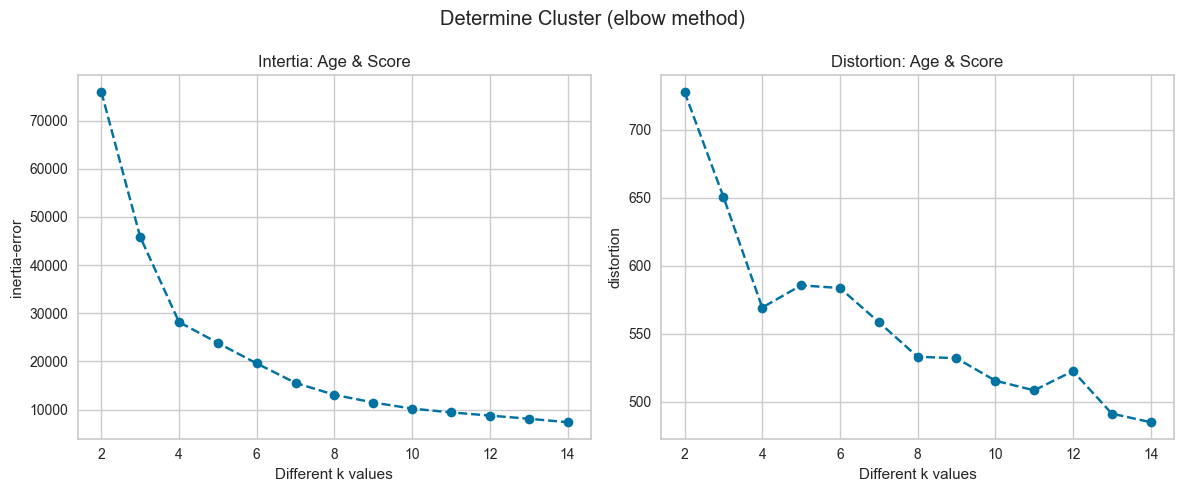

In [27]:
inertia_distortion(X_as, 'Age & Score')

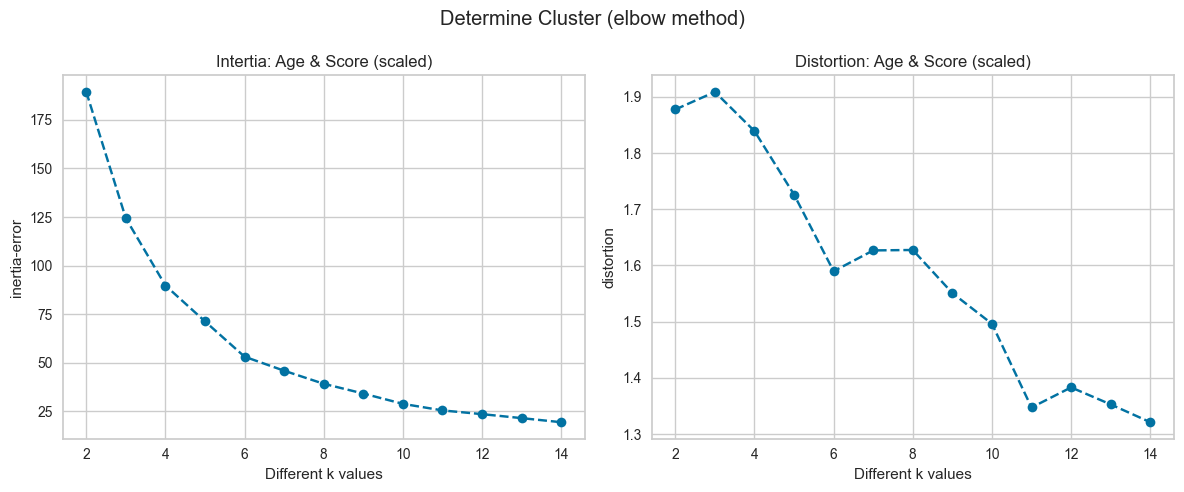

In [28]:
inertia_distortion(X_as_scaled, 'Age & Score (scaled)')

In [29]:
silhouette_iter(X_as, 11, ['a', 's'])

 K Means Clustering  (Features: age & score)
--------------------------------------------------
For n_clusters=2, the silhouette score is 0.469
For n_clusters=3, the silhouette score is 0.453
For n_clusters=4, the silhouette score is 0.500
For n_clusters=5, the silhouette score is 0.468
For n_clusters=6, the silhouette score is 0.443
For n_clusters=7, the silhouette score is 0.423
For n_clusters=8, the silhouette score is 0.432
For n_clusters=9, the silhouette score is 0.412
For n_clusters=10, the silhouette score is 0.406


In [30]:
silhouette_iter(X_as_scaled, 11, ['a', 's'], ' scaled')

 K Means Clustering  (Features: age & score) scaled
--------------------------------------------------
For n_clusters=2, the silhouette score is 0.472
For n_clusters=3, the silhouette score is 0.440
For n_clusters=4, the silhouette score is 0.433
For n_clusters=5, the silhouette score is 0.419
For n_clusters=6, the silhouette score is 0.457
For n_clusters=7, the silhouette score is 0.445
For n_clusters=8, the silhouette score is 0.406
For n_clusters=9, the silhouette score is 0.430
For n_clusters=10, the silhouette score is 0.415


In [31]:
k_means_as, k_means_as_silhouette = k_means_model(X_as, 4)

k_means_as_scaled, k_means_as_silhouette_scaled = k_means_model(X_as_scaled, 6)

K Means Clustering  (Features: age & score)


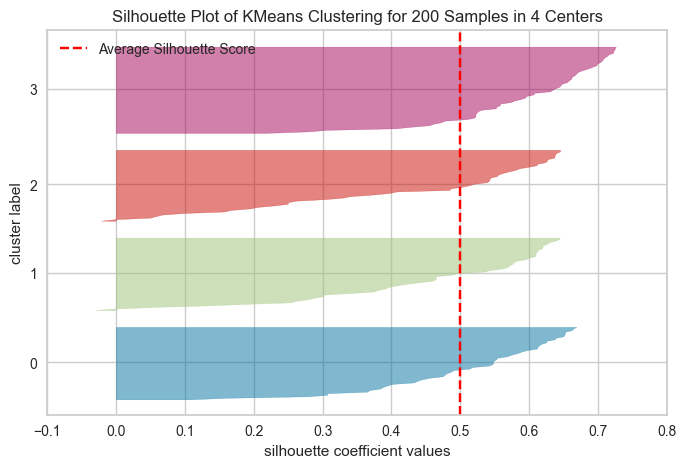

In [32]:
print('K Means Clustering  (Features: age & score)')
visualizer_as = silhouette_show(k_means_as, X_as)

K Means Clustering  (Features: age & score) scaled


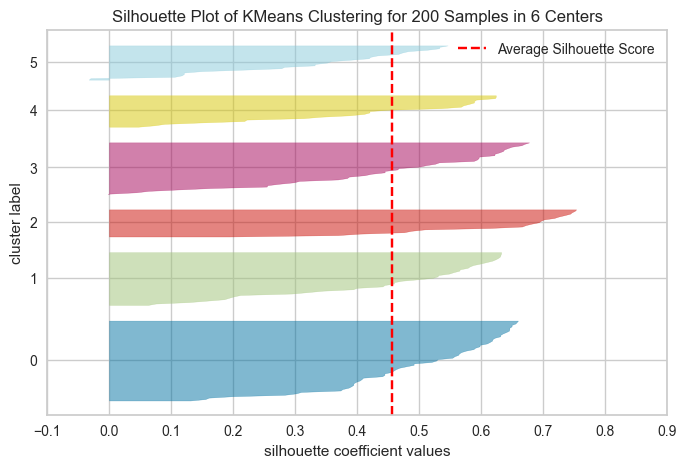

In [33]:
print('K Means Clustering  (Features: age & score) scaled')
visualizer_as_scaled = silhouette_show(k_means_as_scaled, X_as_scaled)

In [34]:
def colorize_silhouette(value):
    if value < 0:
        return colored(value, 'red')
    else:
        return str(round(value, 3))

def silhouette_label(visualizer):
    silhouette_values = visualizer.silhouette_samples_
    print('Individual Silhouette Scores of the Observations'+ '\n'+'-'*50)
    print(f'There are {colored(np.sum(silhouette_values < 0),"red")} values under zero')
    
    for i, silhouette in enumerate(silhouette_values):
        print(f'Sample {i}: {colorize_silhouette(silhouette)}')

In [35]:
silhouette_label(visualizer_as)

Individual Silhouette Scores of the Observations
--------------------------------------------------
There are 3 values under zero
Sample 0: 0.542
Sample 1: 0.606
Sample 2: 0.391
Sample 3: 0.572
Sample 4: 0.486
Sample 5: 0.53
Sample 6: 0.6
Sample 7: 0.645
Sample 8: 0.439
Sample 9: 0.477
Sample 10: 0.301
Sample 11: 0.634
Sample 12: 0.464
Sample 13: 0.587
Sample 14: 0.612
Sample 15: 0.595
Sample 16: 0.25
Sample 17: -0.0006382696976151326
Sample 18: 0.054
Sample 19: 0.644
Sample 20: 0.25
Sample 21: 0.472
Sample 22: 0.628
Sample 23: 0.523
Sample 24: 0.544
Sample 25: 0.705
Sample 26: 0.002
Sample 27: 0.261
Sample 28: 0.133
Sample 29: 0.669
Sample 30: 0.495
Sample 31: 0.406
Sample 32: 0.575
Sample 33: 0.594
Sample 34: 0.609
Sample 35: 0.606
Sample 36: 0.62
Sample 37: 0.522
Sample 38: 0.301
Sample 39: 0.461
Sample 40: 0.394
Sample 41: 0.667
Sample 42: 0.307
Sample 43: 0.303
Sample 44: 0.189
Sample 45: 0.05
Sample 46: 0.486
Sample 47: 0.627
Sample 48: 0.555
Sample 49: 0.513
Sample 50: 0.49
Samp

In [36]:
silhouette_label(visualizer_as_scaled)

Individual Silhouette Scores of the Observations
--------------------------------------------------
There are 3 values under zero
Sample 0: 0.499
Sample 1: 0.394
Sample 2: 0.352
Sample 3: 0.376
Sample 4: 0.32
Sample 5: 0.31
Sample 6: 0.473
Sample 7: 0.528
Sample 8: 0.454
Sample 9: 0.404
Sample 10: 0.222
Sample 11: 0.591
Sample 12: 0.589
Sample 13: 0.41
Sample 14: 0.466
Sample 15: 0.391
Sample 16: 0.121
Sample 17: 0.201
Sample 18: 0.089
Sample 19: 0.598
Sample 20: 0.121
Sample 21: 0.302
Sample 22: 0.314
Sample 23: 0.455
Sample 24: 0.622
Sample 25: 0.622
Sample 26: 0.298
Sample 27: 0.075
Sample 28: -0.02995678316948383
Sample 29: 0.52
Sample 30: 0.571
Sample 31: 0.155
Sample 32: 0.581
Sample 33: 0.398
Sample 34: 0.535
Sample 35: 0.394
Sample 36: 0.105
Sample 37: 0.444
Sample 38: 0.419
Sample 39: 0.199
Sample 40: 0.476
Sample 41: 0.554
Sample 42: 0.444
Sample 43: 0.212
Sample 44: 0.047
Sample 45: 0.186
Sample 46: 0.501
Sample 47: 0.631
Sample 48: 0.472
Sample 49: 0.394
Sample 50: 0.588
Sa

In [37]:
# observations of negative silhouette score 
df.iloc[[17, 180, 184, 28, 28, 86, 150]]

,id,gender,age,income,score
17,18,Male,20,21,66
180,181,Female,37,97,32
184,185,Female,41,99,39
28,29,Female,40,29,31
28,29,Female,40,29,31
86,87,Female,55,57,58
150,151,Male,43,78,17


In [38]:
# calculation of mean silhouette score for each cluster in non scaled model(age & score) with 4 cluster
for i in range(4):
    label = (k_means_as.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer_as.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer_as.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.4197289676734112
mean silhouette score for label 3    : 0.5960779476836082
mean silhouette score for all labels : 0.49973941540141753


In [39]:
# calculation of mean silhouette score for each cluster in scaled model(age & score) with 6 cluster
for i in range(6):
    label = (k_means_as_scaled.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer_as_scaled.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer_as_scaled.silhouette_score_}")

mean silhouette score for label 0    : 0.49595660510776585
mean silhouette score for label 1    : 0.4450364406295178
mean silhouette score for label 2    : 0.6167568426158737
mean silhouette score for label 3    : 0.44483479634515266
mean silhouette score for label 4    : 0.41049576731845167
mean silhouette score for label 5    : 0.31637289617178455
mean silhouette score for all labels : 0.45662830302385726


### Why silhouette_score is negative?

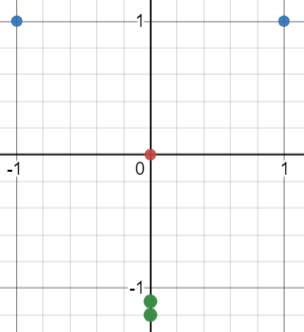

#### *iii. Apply K Means*

In [40]:
# k_means_as, k_means_as_silhouette = k_means_model(X_as, 4)
# k_means_as_scaled, k_means_as_silhouette__scaled = k_means_model(X_as_scaled, 6)

In [41]:
print('K Means Clustering  (Features: age & score)', '\n','-'*50)
print('Cluster: 4' )
print('Silhoutte: ', k_means_as_silhouette)
print('Labels:')
print(k_means_as.labels_)

K Means Clustering  (Features: age & score) 
 --------------------------------------------------
Cluster: 4
Silhoutte:  0.49973941540141753
Labels:
[2 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 2 2 1 3 2 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1
 3 1 3 0 3 0 2 1 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 3 2 3 0 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 0 3
 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [42]:
print('K Means Clustering  (Features: age & score) scaled', '\n','-'*50)
print('Cluster: 6' )
print('Silhoutte: ', k_means_as_silhouette_scaled)
print('Labels:')
print(k_means_as_scaled.labels_)

K Means Clustering  (Features: age & score) scaled 
 --------------------------------------------------
Cluster: 6
Silhoutte:  0.45662830302385726
Labels:
[1 0 5 0 1 0 5 0 4 0 4 0 4 0 5 0 5 1 4 0 5 0 4 0 4 0 3 1 5 0 4 0 4 0 4 0 5
 0 5 0 2 0 3 1 4 1 3 1 1 1 3 1 1 2 3 3 3 2 1 3 2 1 2 3 2 1 3 2 1 1 2 3 2 2
 2 1 3 3 1 3 2 3 2 3 1 3 3 1 1 3 2 1 3 3 1 1 3 1 3 1 1 3 2 1 3 1 2 3 2 2 2
 1 3 1 1 1 2 3 3 3 1 3 3 0 1 0 3 0 4 0 4 0 1 0 5 0 4 0 5 0 4 0 1 0 5 0 3 0
 5 0 5 0 4 0 4 0 5 0 5 0 3 0 5 0 4 0 5 0 5 1 5 0 5 0 4 0 4 0 4 0 5 0 4 0 3
 0 4 0 5 0 5 0 5 0 4 0 3 0 5 0]


In [43]:
df_cluster = df.copy()
df_cluster['Cluster_Kmeans_age_score'] = k_means_as.labels_
df_cluster['Cluster_Kmeans_age_score_scaled'] = k_means_as_scaled.labels_
df_cluster_scaled = pd.concat([df.iloc[:,[0,1,3]], X_as_scaled], axis=1)
df_cluster_scaled['Cluster_Kmeans_age_score_scaled'] = k_means_as_scaled.labels_
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled
0,1,Male,19,15,39,2,1
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,1,5
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,2,1


In [44]:
# pd.concat([df.iloc[:,[0,1,3]], X_as_scaled], axis=1)
df_cluster_scaled.head()

,id,gender,income,age,score,Cluster_Kmeans_age_score_scaled
0,1,Male,15,-1.425,-0.435,1
1,2,Male,15,-1.281,1.196,0
2,3,Female,16,-1.353,-1.716,5
3,4,Female,16,-1.138,1.040,0
4,5,Female,17,-0.563,-0.396,1


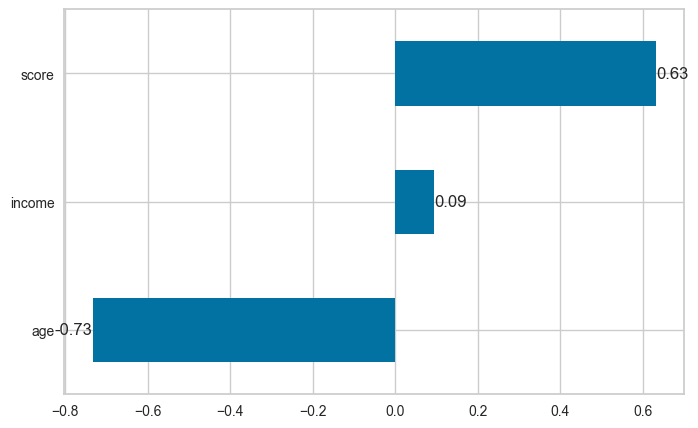

In [45]:
ax = df_cluster.drop(['id', 'gender'], axis= 1).corr()['Cluster_Kmeans_age_score'][:-2].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

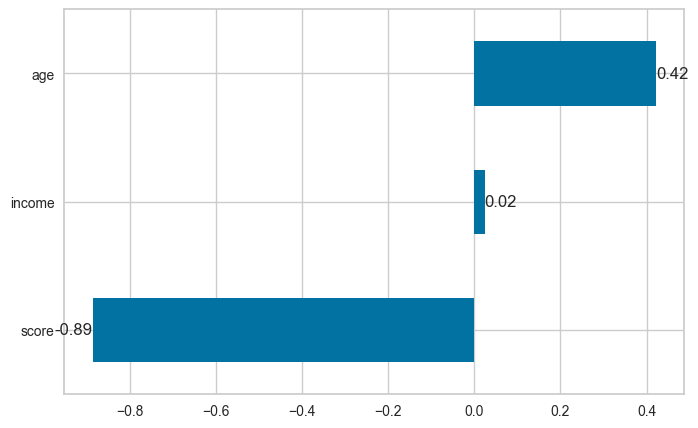

In [46]:
ax = df_cluster.drop(['id', 'gender'], axis= 1).corr()['Cluster_Kmeans_age_score_scaled'][:-2].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

#### *iv. Visualizing and Labeling All the Clusters*

In [47]:
def visualize_cluster(x, y, hue, data, model):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x = x, y = y, hue = hue, data=data, palette="bright")
    
    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);

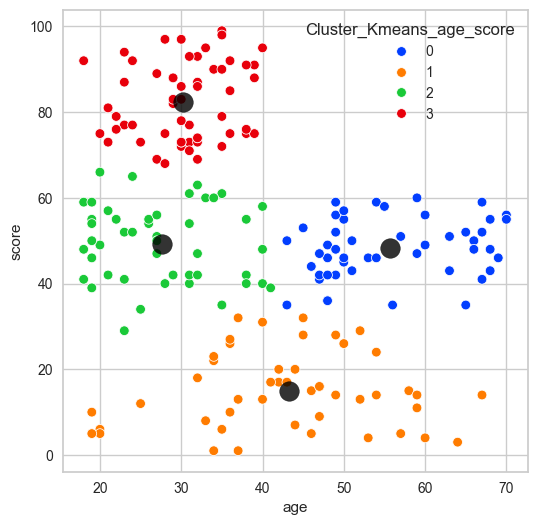

In [48]:
visualize_cluster(x='age',y='score',hue='Cluster_Kmeans_age_score', data=df_cluster, model = k_means_as)

In [49]:
k_means_as.cluster_centers_

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617],
       [30.1754386 , 82.35087719]])

In [50]:
k_means_as_scaled.cluster_centers_

array([[-0.62254456,  1.24814723],
       [-0.98830286,  0.01062485],
       [ 1.86593393, -0.01358755],
       [ 0.59071744, -0.16514902],
       [ 1.00613779, -1.40702839],
       [-0.37103379, -1.31216875]])

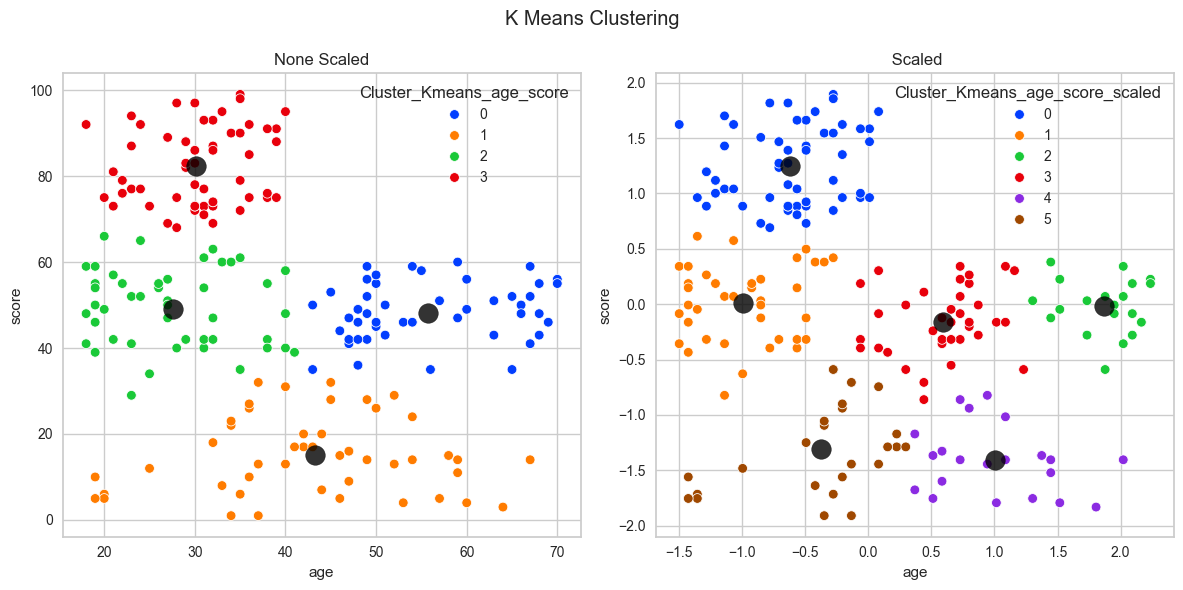

In [110]:
plt.figure(figsize=(12, 6))

plt.suptitle ('K Means Clustering')
plt.subplot(121)
sns.scatterplot(x='age', y='score', hue='Cluster_Kmeans_age_score', data=df_cluster, palette="bright")
centers = k_means_as.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8)
plt.title("None Scaled")


plt.subplot(122)
sns.scatterplot(x='age', y='score', hue='Cluster_Kmeans_age_score_scaled', data=df_cluster_scaled, palette="bright")
centers = k_means_as_scaled.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8) 
plt.title(" Scaled");

plt.tight_layout();

In [52]:
fig = px.scatter_3d(df_cluster, 
                    x='age',
                    y='income',
                    z='score',
                    color='Cluster_Kmeans_age_score',
                    labels={'x': 'age',
                            'y': 'income',
                            'z': 'score'},
                   )
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    autosize=False, 
    width=800,  
    height=600  
)

fig.show()

In [53]:
df_cluster_scaled.head()

,id,gender,income,age,score,Cluster_Kmeans_age_score_scaled
0,1,Male,15,-1.425,-0.435,1
1,2,Male,15,-1.281,1.196,0
2,3,Female,16,-1.353,-1.716,5
3,4,Female,16,-1.138,1.040,0
4,5,Female,17,-0.563,-0.396,1


In [54]:
fig = px.scatter_3d(df_cluster_scaled, 
                    x='age',
                    y='income',
                    z='score',
                    color='Cluster_Kmeans_age_score_scaled',
                    labels={'x': 'age',
                            'y': 'income',
                            'z': 'score'},
                   )
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    autosize=False, 
    width=800,  
    height=600  
)

fig.show()

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [55]:
scaler = StandardScaler()
X_is = df[['income', 'score']]
# X_is_scaled = scaler.fit_transform(X_is)
X_is_scaled = pd.DataFrame(scaler.fit_transform(X_is), columns=['income', 'score'])

In [56]:
print(f'Feature: Income & Score Hopkins:          { np.mean([hopkins(X_is, 1) for i in range(10)]) :<.3f}')
print(f'Feature: Income & Score (scaled) Hopkins: {np.mean([hopkins(X_is_scaled, 1) for i in range(10)]):<.3f}')

Feature: Income & Score Hopkins:          0.703
Feature: Income & Score (scaled) Hopkins: 0.698


#### *ii. Determine optimal number of clusters*

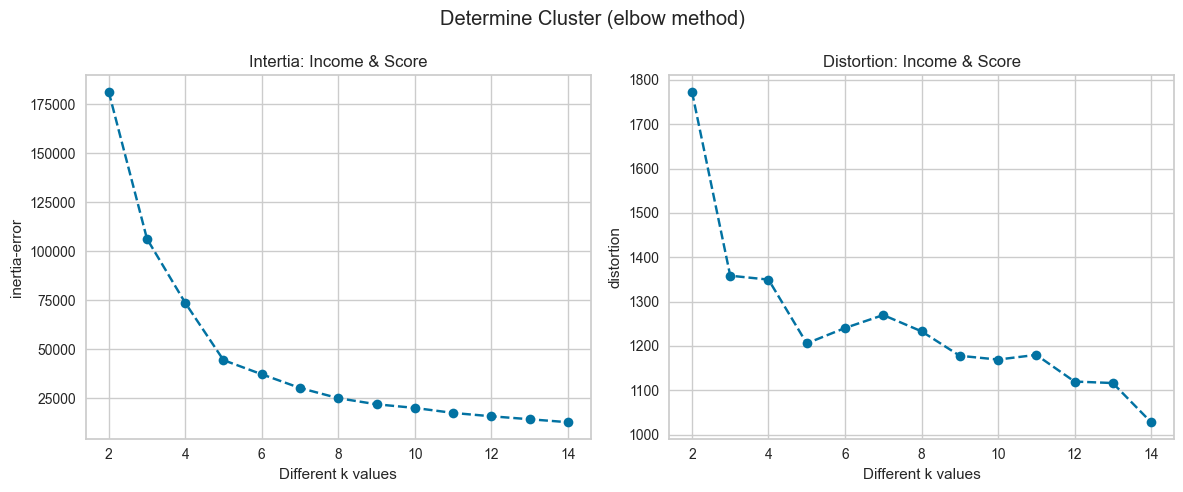

In [57]:
inertia_distortion(X_is, 'Income & Score')

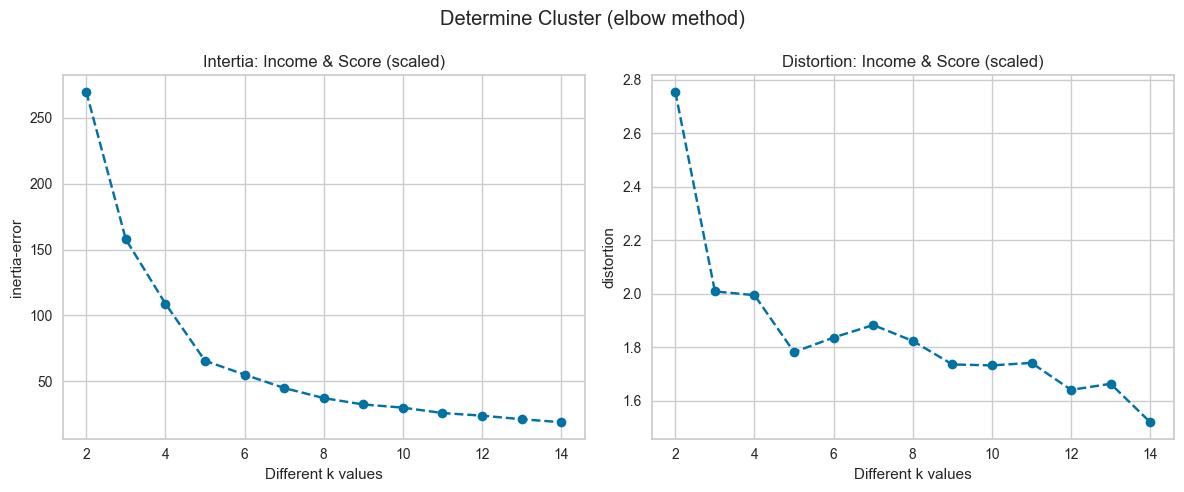

In [58]:
inertia_distortion(X_is_scaled, 'Income & Score (scaled)')

In [59]:
silhouette_iter(X_is, 11, ['i', 's'])

 K Means Clustering  (Features: income & score)
--------------------------------------------------
For n_clusters=2, the silhouette score is 0.297
For n_clusters=3, the silhouette score is 0.468
For n_clusters=4, the silhouette score is 0.493
For n_clusters=5, the silhouette score is 0.554
For n_clusters=6, the silhouette score is 0.542
For n_clusters=7, the silhouette score is 0.532
For n_clusters=8, the silhouette score is 0.458
For n_clusters=9, the silhouette score is 0.460
For n_clusters=10, the silhouette score is 0.442


In [60]:
silhouette_iter(X_is_scaled, 11, ['i', 's'], ' scaled')

 K Means Clustering  (Features: income & score) scaled
--------------------------------------------------
For n_clusters=2, the silhouette score is 0.295
For n_clusters=3, the silhouette score is 0.467
For n_clusters=4, the silhouette score is 0.494
For n_clusters=5, the silhouette score is 0.555
For n_clusters=6, the silhouette score is 0.538
For n_clusters=7, the silhouette score is 0.531
For n_clusters=8, the silhouette score is 0.456
For n_clusters=9, the silhouette score is 0.458
For n_clusters=10, the silhouette score is 0.441


In [61]:
k_means_is, k_means_is_silhouette = k_means_model(X_is, 5)

k_means_is_scaled, k_means_is_silhouette_scaled = k_means_model(X_is_scaled, 5)

K Means Clustering  (Features: income & score)


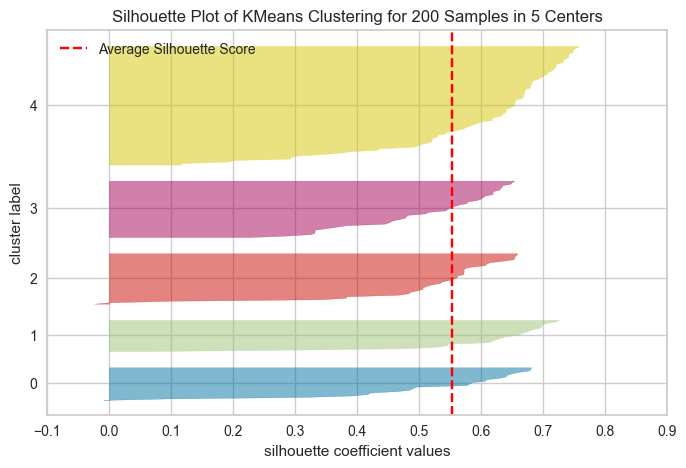

In [62]:
print('K Means Clustering  (Features: income & score)')
visualizer_is = silhouette_show(k_means_is, X_is)

K Means Clustering  (Features: income & score) scaled


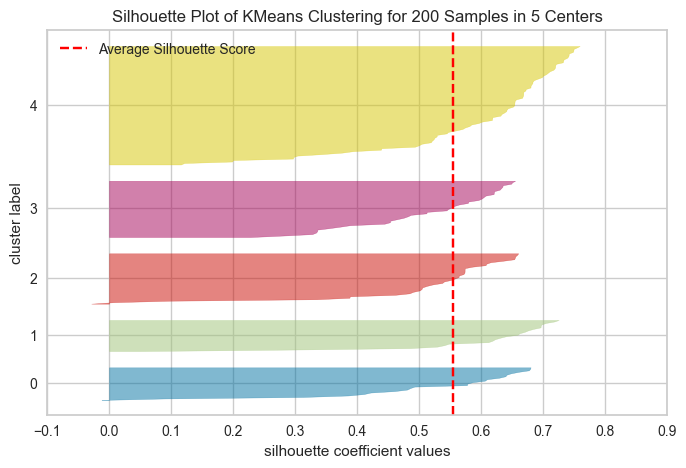

In [63]:
print('K Means Clustering  (Features: income & score) scaled')
visualizer_is_scaled = silhouette_show(k_means_is_scaled, X_is_scaled)

In [64]:
silhouette_label(visualizer_is)

Individual Silhouette Scores of the Observations
--------------------------------------------------
There are 2 values under zero
Sample 0: 0.417
Sample 1: 0.696
Sample 2: 0.64
Sample 3: 0.696
Sample 4: 0.392
Sample 5: 0.698
Sample 6: 0.649
Sample 7: 0.66
Sample 8: 0.63
Sample 9: 0.664
Sample 10: 0.678
Sample 11: 0.624
Sample 12: 0.68
Sample 13: 0.719
Sample 14: 0.681
Sample 15: 0.726
Sample 16: 0.486
Sample 17: 0.545
Sample 18: 0.581
Sample 19: 0.632
Sample 20: 0.466
Sample 21: 0.677
Sample 22: 0.642
Sample 23: 0.672
Sample 24: 0.661
Sample 25: 0.705
Sample 26: 0.489
Sample 27: 0.301
Sample 28: 0.496
Sample 29: 0.685
Sample 30: 0.606
Sample 31: 0.612
Sample 32: 0.577
Sample 33: 0.618
Sample 34: 0.609
Sample 35: 0.639
Sample 36: 0.586
Sample 37: 0.529
Sample 38: 0.421
Sample 39: 0.484
Sample 40: 0.093
Sample 41: 0.546
Sample 42: -0.009277694019911836
Sample 43: 0.117
Sample 44: 0.311
Sample 45: 0.051
Sample 46: 0.388
Sample 47: 0.433
Sample 48: 0.292
Sample 49: 0.292
Sample 50: 0.52
Sa

In [65]:
silhouette_label(visualizer_is_scaled)

Individual Silhouette Scores of the Observations
--------------------------------------------------
There are 2 values under zero
Sample 0: 0.411
Sample 1: 0.696
Sample 2: 0.639
Sample 3: 0.696
Sample 4: 0.386
Sample 5: 0.697
Sample 6: 0.648
Sample 7: 0.659
Sample 8: 0.629
Sample 9: 0.662
Sample 10: 0.677
Sample 11: 0.623
Sample 12: 0.679
Sample 13: 0.718
Sample 14: 0.68
Sample 15: 0.725
Sample 16: 0.481
Sample 17: 0.541
Sample 18: 0.578
Sample 19: 0.631
Sample 20: 0.461
Sample 21: 0.676
Sample 22: 0.641
Sample 23: 0.67
Sample 24: 0.661
Sample 25: 0.705
Sample 26: 0.486
Sample 27: 0.293
Sample 28: 0.493
Sample 29: 0.685
Sample 30: 0.606
Sample 31: 0.612
Sample 32: 0.577
Sample 33: 0.618
Sample 34: 0.61
Sample 35: 0.64
Sample 36: 0.586
Sample 37: 0.529
Sample 38: 0.422
Sample 39: 0.486
Sample 40: 0.091
Sample 41: 0.548
Sample 42: -0.012124759727625212
Sample 43: 0.121
Sample 44: 0.313
Sample 45: 0.05
Sample 46: 0.394
Sample 47: 0.439
Sample 48: 0.297
Sample 49: 0.297
Sample 50: 0.525
Sa

In [66]:
# observations of negative silhouette score 
df.iloc[[42, 146]]

,id,gender,age,income,score
42,43,Male,48,39,36
146,147,Male,48,77,36


In [67]:
# calculation of mean silhouette score for each cluster in non scaled model(income & score) with 5 cluster
for i in range(5):
    label = (k_means_is.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer_is.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer_is.silhouette_score_}")

mean silhouette score for label 0    : 0.5122676140736505
mean silhouette score for label 1    : 0.5990128687006722
mean silhouette score for label 2    : 0.5039873487056818
mean silhouette score for label 3    : 0.5091706489322517
mean silhouette score for label 4    : 0.5966512190217801
mean silhouette score for all labels : 0.553931997444648


In [68]:
# calculation of mean silhouette score for each cluster in scaled model(age & score) with 6 cluster
for i in range(5):
    label = (k_means_is_scaled.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer_is_scaled.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer_is_scaled.silhouette_score_}")

mean silhouette score for label 0    : 0.5105060797073506
mean silhouette score for label 1    : 0.5982119461245773
mean silhouette score for label 2    : 0.505215392212549
mean silhouette score for label 3    : 0.5107528927571013
mean silhouette score for label 4    : 0.5978670176450109
mean silhouette score for all labels : 0.5546571631111091


#### *iii. Apply K Means*

In [69]:
print('K Means Clustering  (Features: income & score)', '\n','-'*50)
print('Cluster: 5' )
print('Silhoutte: ', k_means_is_silhouette)
print('Labels:')
print(k_means_is.labels_)

K Means Clustering  (Features: income & score) 
 --------------------------------------------------
Cluster: 5
Silhoutte:  0.553931997444648
Labels:
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 4 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 4 3 2 3 2 3 4 3 2 3 2 3 2 3 2 3 4 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [70]:
print('K Means Clustering  (Features: income & score) scaled', '\n','-'*50)
print('Cluster: 5' )
print('Silhoutte: ', k_means_is_silhouette_scaled)
print('Labels:')
print(k_means_is_scaled.labels_)

K Means Clustering  (Features: income & score) scaled 
 --------------------------------------------------
Cluster: 5
Silhoutte:  0.5546571631111091
Labels:
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 4 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 4 3 2 3 2 3 4 3 2 3 2 3 2 3 2 3 4 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [71]:
k_means_is.labels_ == k_means_is_scaled.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [72]:
df_cluster['Cluster_Kmeans_income_score'] = k_means_is.labels_
df_cluster_scaled['income'] = X_is_scaled.iloc[:,0]
df_cluster_scaled['Cluster_Kmeans_income_score_scaled'] = k_means_is_scaled.labels_
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score
0,1,Male,19,15,39,2,1,0
1,2,Male,21,15,81,3,0,1
2,3,Female,20,16,6,1,5,0
3,4,Female,23,16,77,3,0,1
4,5,Female,31,17,40,2,1,0


In [73]:
df_cluster_scaled.head()

,id,gender,income,age,score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score_scaled
0,1,Male,-1.739,-1.425,-0.435,1,0
1,2,Male,-1.739,-1.281,1.196,0,1
2,3,Female,-1.701,-1.353,-1.716,5,0
3,4,Female,-1.701,-1.138,1.040,0,1
4,5,Female,-1.663,-0.563,-0.396,1,0


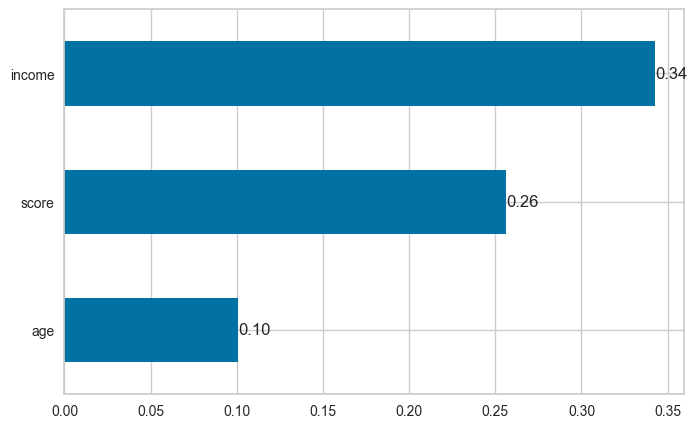

In [74]:
ax = df_cluster.drop(['id', 'gender','Cluster_Kmeans_age_score_scaled'], axis= 1).corr()['Cluster_Kmeans_income_score'][:-2].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

#### *iv. Visualizing and Labeling All the Clusters*

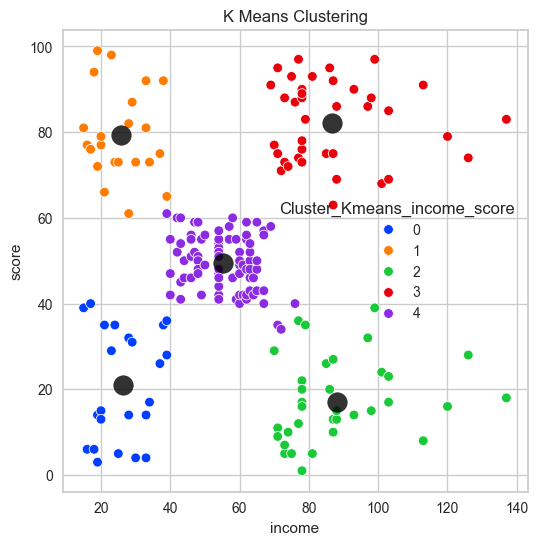

In [75]:
# visualize_cluster(x='income',y='score',hue='Cluster_Kmeans_income_score', data=df_cluster, model = k_means_is)

plt.figure(figsize=(6, 6))
sns.scatterplot(x='income', y='score', hue='Cluster_Kmeans_income_score', data=df_cluster, palette="bright")
centers = k_means_is.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8)
plt.title("K Means Clustering");

In [76]:
k_means_is.cluster_centers_

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852]])

In [77]:
fig = px.scatter_3d(df_cluster, 
                    x='age',
                    y='income',
                    z='score',
                    color='Cluster_Kmeans_income_score',
                    labels={'x': 'age',
                            'y': 'income',
                            'z': 'score'},
                   )
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    autosize=False, 
    width=800,  
    height=600  
)

fig.show()

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [78]:
X_as.head()

,age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [79]:
def scores_scale(X):
    result = []
    for _ in range(10):
        result.append(hopkins(MinMaxScaler().fit_transform(X), 1))    

    print(f'Feature: Age & Score Hopkins (Min_Max Scale): { np.mean(result) :<.3f}')

    result = []
    for _ in range(10):
        result.append(hopkins(StandardScaler().fit_transform(X), 1)) 
         
    print(f'Feature: Age & Score Hopkins (Standart Scale): { np.mean(result) :<.3f}')

In [80]:
scores_scale(X_as)

Feature: Age & Score Hopkins (Min_Max Scale): 0.694
Feature: Age & Score Hopkins (Standart Scale): 0.688


In [81]:
X_as_scaled.head()

,age,score
0,-1.425,-0.435
1,-1.281,1.196
2,-1.353,-1.716
3,-1.138,1.040
4,-0.563,-0.396


In [82]:
def show_dendrogram(X, title):
    hierarchial_as_ward = linkage(y = X, method = "ward")
    hierarchial_as_complete = linkage(y = X, method = "complete")
    hierarchial_as_average = linkage(y = X, method = "average")
    hierarchial_as_single = linkage(y = X, method = "single")
    
    plt.figure(figsize = (12,6))
    plt.suptitle("Dendrogram: " + title)
    
    plt.subplot(221)
    plt.title("Ward")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(hierarchial_as_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)
    plt.subplot(222)
    plt.title("Complete")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(hierarchial_as_complete,  leaf_font_size = 10,truncate_mode='lastp', p=10)

    plt.subplot(223)
    plt.title("Average")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(hierarchial_as_average,  leaf_font_size = 10,truncate_mode='lastp', p=10)

    plt.subplot(224)
    plt.title("Single")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(hierarchial_as_single,  leaf_font_size = 10, truncate_mode='lastp', p=10);

    plt.tight_layout();

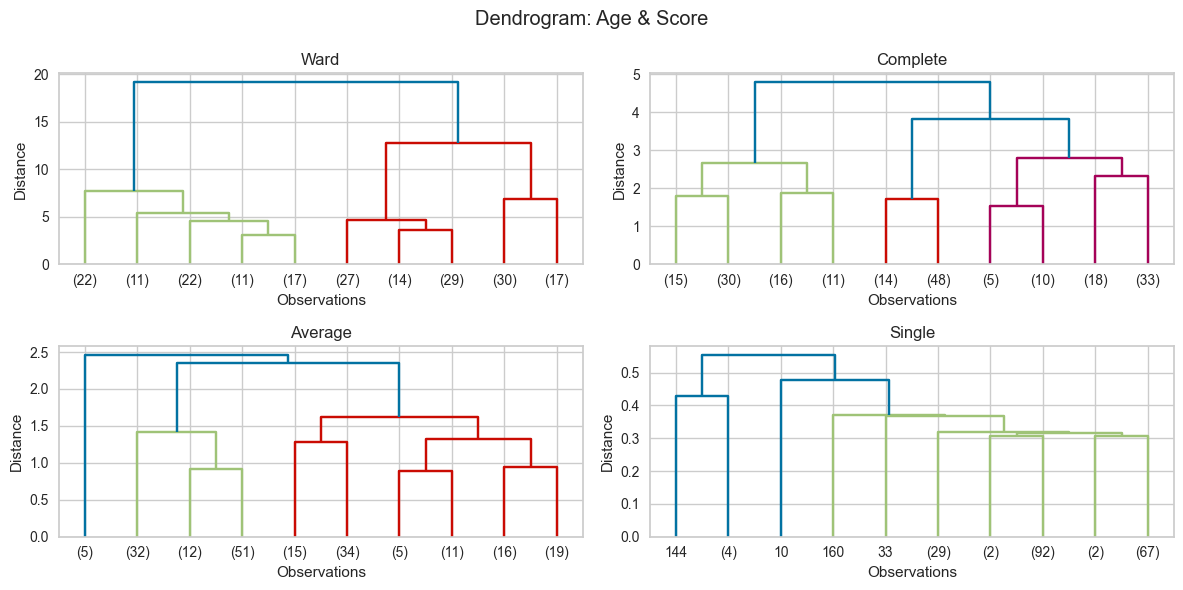

In [83]:
show_dendrogram(X_as_scaled, 'Age & Score')

## Clustering based on Annual Income and Spending Score- x2

In [84]:
X_is.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [85]:
scores_scale(X_is)

Feature: Age & Score Hopkins (Min_Max Scale): 0.695
Feature: Age & Score Hopkins (Standart Scale): 0.700


In [86]:
X_is_scaled.head()

,income,score
0,-1.739,-0.435
1,-1.739,1.196
2,-1.701,-1.716
3,-1.701,1.040
4,-1.663,-0.396


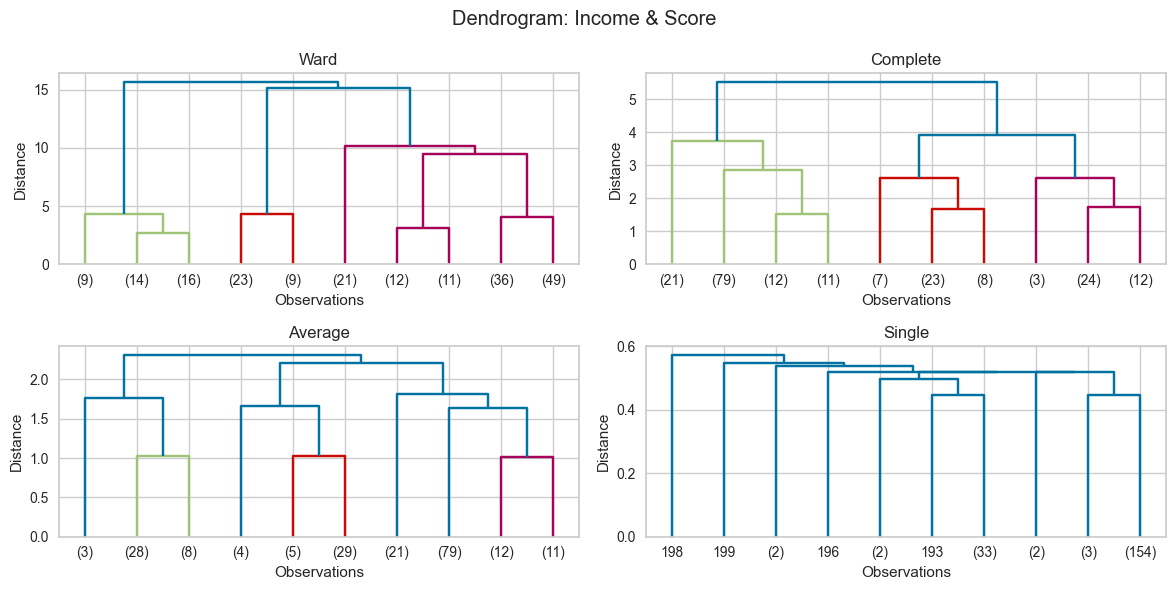

In [87]:
show_dendrogram(X_is_scaled, 'Income & Score')

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [88]:
silhouette_iter(X_as_scaled, 11, ['a', 's'], ' scaled')

 K Means Clustering  (Features: age & score) scaled
--------------------------------------------------
For n_clusters=2, the silhouette score is 0.472
For n_clusters=3, the silhouette score is 0.440
For n_clusters=4, the silhouette score is 0.433
For n_clusters=5, the silhouette score is 0.419
For n_clusters=6, the silhouette score is 0.457
For n_clusters=7, the silhouette score is 0.445
For n_clusters=8, the silhouette score is 0.406
For n_clusters=9, the silhouette score is 0.430
For n_clusters=10, the silhouette score is 0.415


In [89]:
hierarchial_as = AgglomerativeClustering(n_clusters= 6, linkage='ward', affinity ='euclidean' ) 
df_cluster['Cluster_Hierarchial_age_score'] = hierarchial_as.fit_predict(X_as_scaled)
df_cluster_scaled['Cluster_Hierarchial_age_score'] = hierarchial_as.fit_predict(X_as_scaled)

In [90]:
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score,Cluster_Hierarchial_age_score
0,1,Male,19,15,39,2,1,0,4
1,2,Male,21,15,81,3,0,1,0
2,3,Female,20,16,6,1,5,0,1
3,4,Female,23,16,77,3,0,1,0
4,5,Female,31,17,40,2,1,0,4


#### Annual Income and Spending Score- x2

In [91]:
silhouette_iter(X_is_scaled, 11, ['i', 's'], ' scaled')

 K Means Clustering  (Features: income & score) scaled
--------------------------------------------------
For n_clusters=2, the silhouette score is 0.295
For n_clusters=3, the silhouette score is 0.467
For n_clusters=4, the silhouette score is 0.494
For n_clusters=5, the silhouette score is 0.555
For n_clusters=6, the silhouette score is 0.538
For n_clusters=7, the silhouette score is 0.531
For n_clusters=8, the silhouette score is 0.456
For n_clusters=9, the silhouette score is 0.458
For n_clusters=10, the silhouette score is 0.441


In [92]:
hierarchial_is = AgglomerativeClustering(n_clusters= 5, linkage='ward', metric='euclidean' ) 
df_cluster['Cluster_Hierarchial_income_score'] = hierarchial_is.fit_predict(X_is_scaled)
df_cluster_scaled['Cluster_Hierarchial_income_score'] = hierarchial_is.fit_predict(X_is_scaled)

In [93]:
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score,Cluster_Hierarchial_age_score,Cluster_Hierarchial_income_score
0,1,Male,19,15,39,2,1,0,4,4
1,2,Male,21,15,81,3,0,1,0,3
2,3,Female,20,16,6,1,5,0,1,4
3,4,Female,23,16,77,3,0,1,0,3
4,5,Female,31,17,40,2,1,0,4,4


In [94]:
df_cluster_scaled.head()

,id,gender,income,age,score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score_scaled,Cluster_Hierarchial_age_score,Cluster_Hierarchial_income_score
0,1,Male,-1.739,-1.425,-0.435,1,0,4,4
1,2,Male,-1.739,-1.281,1.196,0,1,0,3
2,3,Female,-1.701,-1.353,-1.716,5,0,1,4
3,4,Female,-1.701,-1.138,1.040,0,1,0,3
4,5,Female,-1.663,-0.563,-0.396,1,0,4,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

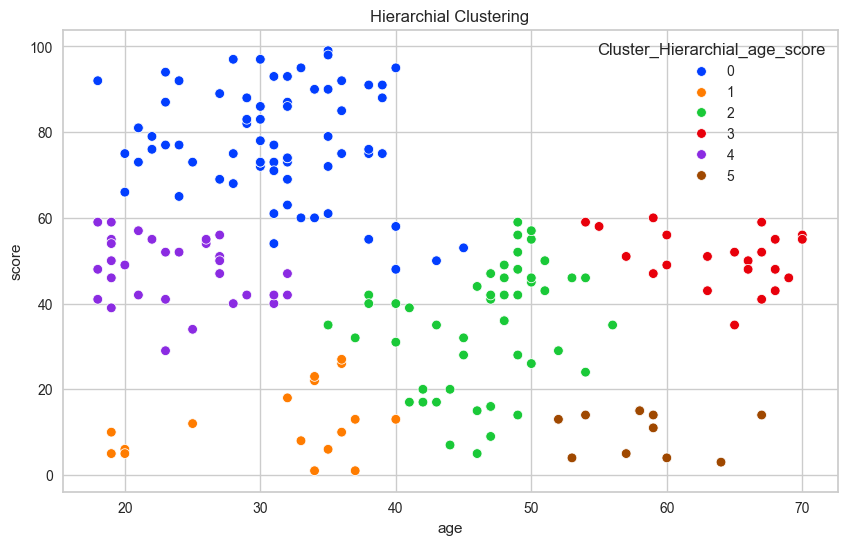

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='score', hue='Cluster_Hierarchial_age_score', data=df_cluster, palette="bright")
plt.title("Hierarchial Clustering");

<Figure size 2000x1000 with 0 Axes>

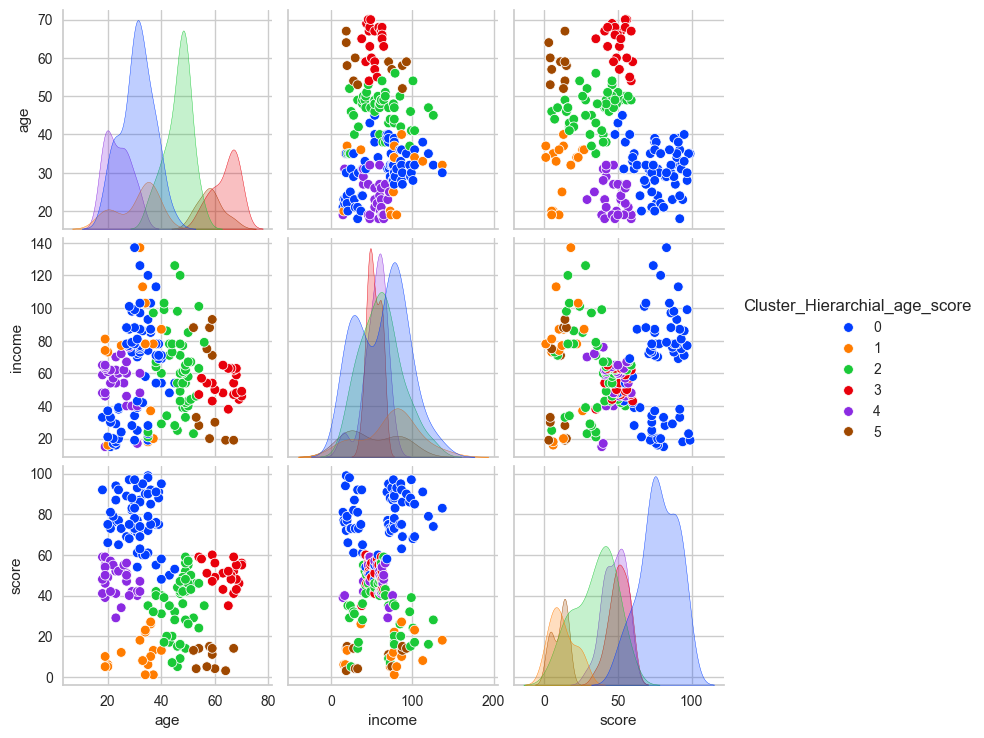

In [96]:
plt.figure(figsize = (20,10))
sns.pairplot(data=df_cluster.iloc[:, [2, 3, 4, 8]], hue="Cluster_Hierarchial_age_score", palette="bright");

In [97]:
fig = px.scatter_3d(df_cluster,
                    x='age',
                    y='income',
                    z='score',
                    color='Cluster_Hierarchial_age_score',
                    labels={'x': 'age',
                            'y': 'income',
                            'z': 'score'},)
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    autosize=False, 
    width=800,  
    height=600  
)

fig.show()

In [98]:
df_cluster.iloc[:,[2,3,4,8]].groupby("Cluster_Hierarchial_age_score").mean().T

Cluster_Hierarchial_age_score,0,1,2,3,4,5
age,30.943,31.000,46.340,63.909,23.767,58.273
income,62.886,73.176,62.000,53.045,54.500,51.273
score,77.829,12.118,34.640,50.636,47.600,10.182


In [99]:
df_cluster_scaled.iloc[:,[2,3,4,7]].groupby("Cluster_Hierarchial_age_score").mean().T

Cluster_Hierarchial_age_score,0,1,2,3,4,5
income,0.089,0.482,0.055,-0.287,-0.231,-0.354
age,-0.567,-0.563,0.538,1.798,-1.082,1.394
score,1.073,-1.478,-0.604,0.017,-0.101,-1.554


In [100]:
df_cluster_scaled.iloc[:,[2,3,4,7]].groupby("Cluster_Hierarchial_age_score").count().T

Cluster_Hierarchial_age_score,0,1,2,3,4,5
income,70,17,50,22,30,11
age,70,17,50,22,30,11
score,70,17,50,22,30,11


#### Annual Income and Spending Score- x2

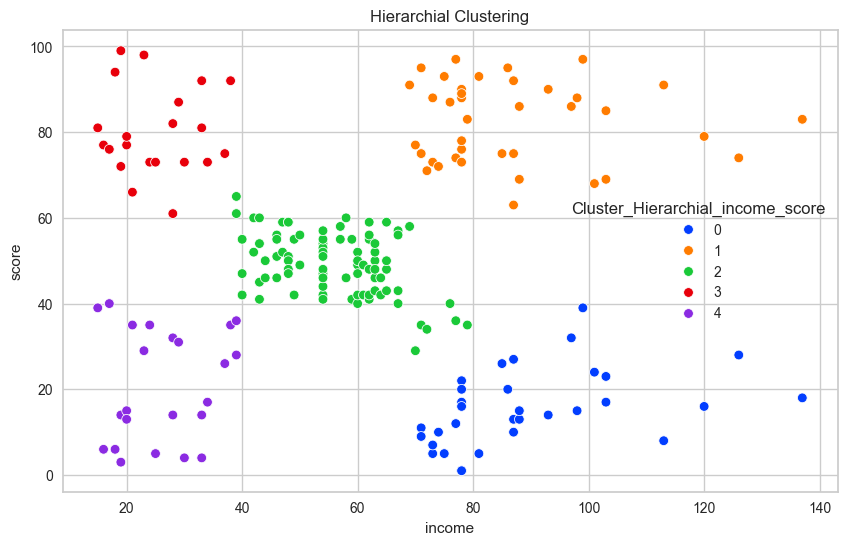

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='score', hue='Cluster_Hierarchial_income_score', data=df_cluster, palette="bright")
plt.title("Hierarchial Clustering");

In [103]:
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score,Cluster_Hierarchial_age_score,Cluster_Hierarchial_income_score
0,1,Male,19,15,39,2,1,0,4,4
1,2,Male,21,15,81,3,0,1,0,3
2,3,Female,20,16,6,1,5,0,1,4
3,4,Female,23,16,77,3,0,1,0,3
4,5,Female,31,17,40,2,1,0,4,4


<Figure size 2000x1000 with 0 Axes>

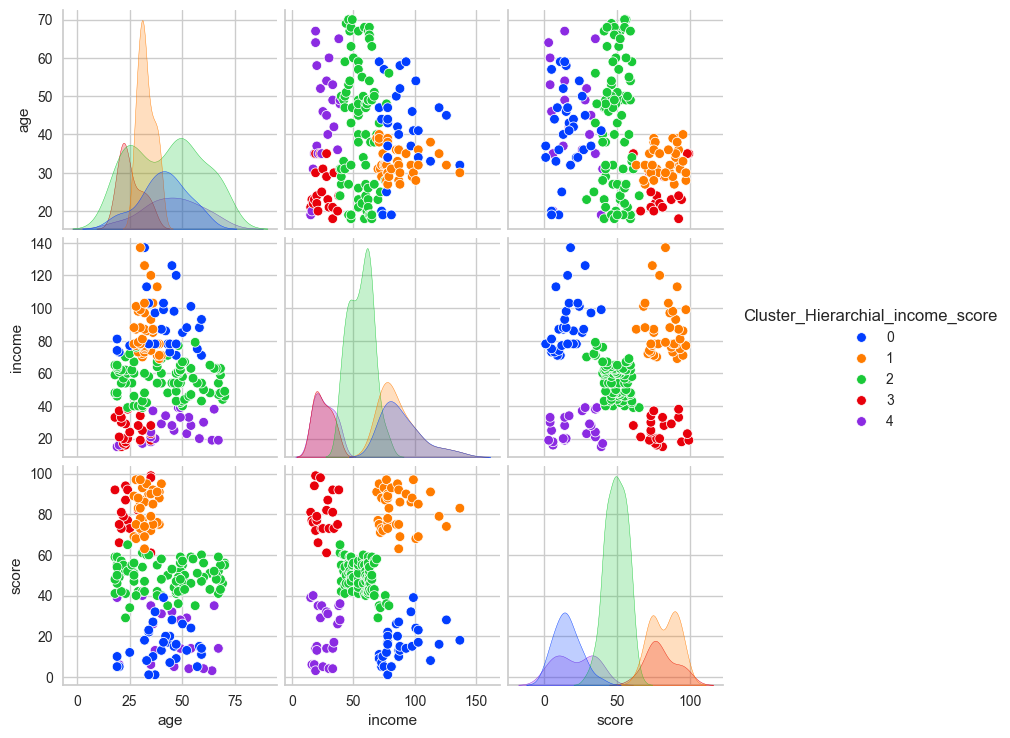

In [104]:
plt.figure(figsize = (20,10))
sns.pairplot(data=df_cluster.iloc[:, [2, 3, 4, 9]], hue="Cluster_Hierarchial_income_score", palette="bright");

In [105]:
fig = px.scatter_3d(df_cluster,
                    x='age',
                    y='income',
                    z='score',
                    color='Cluster_Hierarchial_income_score',
                    labels={'x': 'age',
                            'y': 'income',
                            'z': 'score'},)
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    autosize=False, 
    width=800,  
    height=600  
)

fig.show()

In [106]:
# df_cluster.drop(['id', 'gender'], axis= 1).groupby("Cluster_Hierarchial_income_score").mean().T
df_cluster.iloc[:,[2,3,4,9]].groupby("Cluster_Hierarchial_income_score").mean().T

Cluster_Hierarchial_income_score,0,1,2,3,4
age,41.000,32.692,42.482,25.333,45.217
income,89.406,86.538,55.812,25.095,26.304
score,15.594,82.128,49.129,80.048,20.913


In [107]:
df_cluster_scaled.iloc[:,[2,3,4,8]].groupby("Cluster_Hierarchial_income_score").mean().T

Cluster_Hierarchial_income_score,0,1,2,3,4
income,1.101,0.992,-0.181,-1.354,-1.308
age,0.154,-0.442,0.261,-0.970,0.457
score,-1.343,1.240,-0.042,1.159,-1.137


In [108]:
df_cluster_scaled.iloc[:,[2,3,4,8]].groupby("Cluster_Hierarchial_income_score").count().T

Cluster_Hierarchial_income_score,0,1,2,3,4
income,32,39,85,21,23
age,32,39,85,21,23
score,32,39,85,21,23


#### Interpretation based on Age and Spending Score- x1

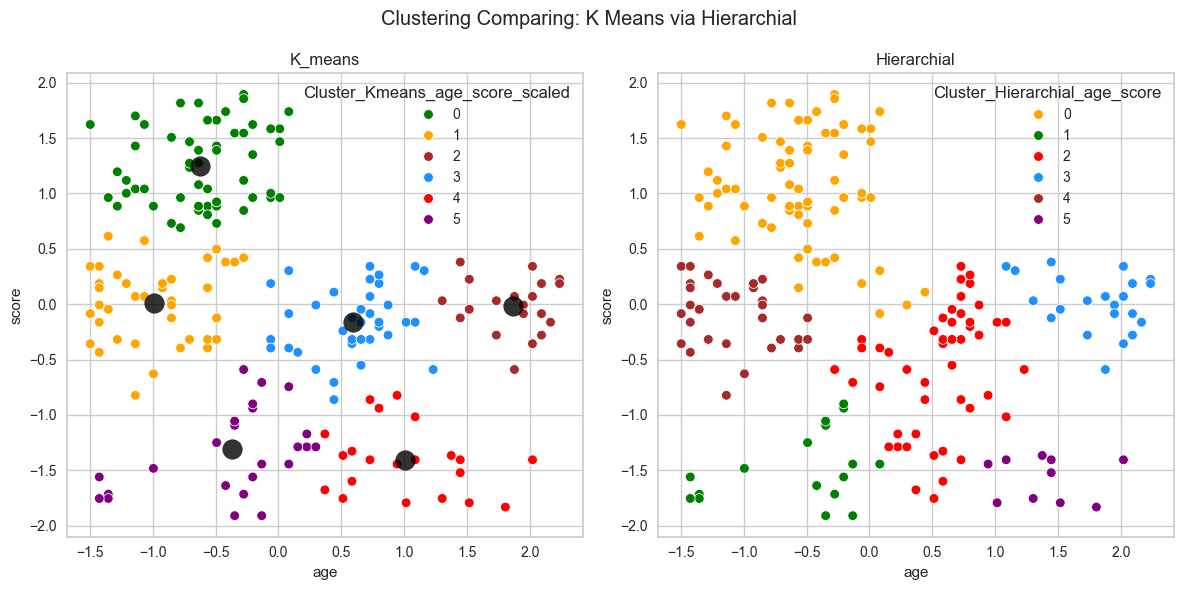

In [136]:
plt.figure(figsize=(12, 6))

plt.suptitle ('Clustering Comparing: K Means via Hierarchial ')
plt.subplot(121)
sns.scatterplot(x='age',
                y='score',
                hue='Cluster_Kmeans_age_score_scaled',
                data=df_cluster_scaled,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red', 'purple'])
centers = k_means_as_scaled.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8)
plt.title("K_means")


plt.subplot(122)
sns.scatterplot(x='age',
                y='score',
                hue='Cluster_Hierarchial_age_score',
                data=df_cluster_scaled,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown', 'purple'])
plt.title("Hierarchial")
plt.tight_layout();

In [137]:
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score,Cluster_Hierarchial_age_score,Cluster_Hierarchial_income_score
0,1,Male,19,15,39,2,1,0,4,4
1,2,Male,21,15,81,3,0,1,0,3
2,3,Female,20,16,6,1,5,0,1,4
3,4,Female,23,16,77,3,0,1,0,3
4,5,Female,31,17,40,2,1,0,4,4


In [140]:
df_cluster.iloc[:,[2,3,4]].mean()

age      38.850
income   60.560
score    50.200
dtype: float64

In [139]:
df_cluster.iloc[:,[2,3,4,6]].groupby('Cluster_Kmeans_age_score_scaled').mean()

,age,income,score
Cluster_Kmeans_age_score_scaled,,,
0,30.175,66.070,82.351
1,25.079,52.421,50.474
2,64.850,53.150,49.850
3,47.081,59.108,45.946
4,52.870,60.348,13.957
5,33.680,68.640,16.400


### Conclusion

**cluster 0** : The average age is around 30, both annula_income are more than average and spending_scores is high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 1**: The average age is around 25, the annula_income is low and the spending_scores is on average.
It should be researched what can be done to direct to more spending.

**cluster 2** :The average age is around 64. The annula_income is low but spending_scores is on average.
It should be researched what can be done to direct to more spending.
    
**cluster 3**: The average age is around 47.both annula_income is on average and spending_scores is low.
It should be researched what can be done to direct to more spending.

**cluster 4**: The average age is around 52.both annula_income is on average but spending_scores is very low.
It should be researched what can be done to direct to more spending.

**cluster 5**: The average age is around 33, annula_income is high but spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.

#### Interpretation based on Annual Income and Spending Score- x2

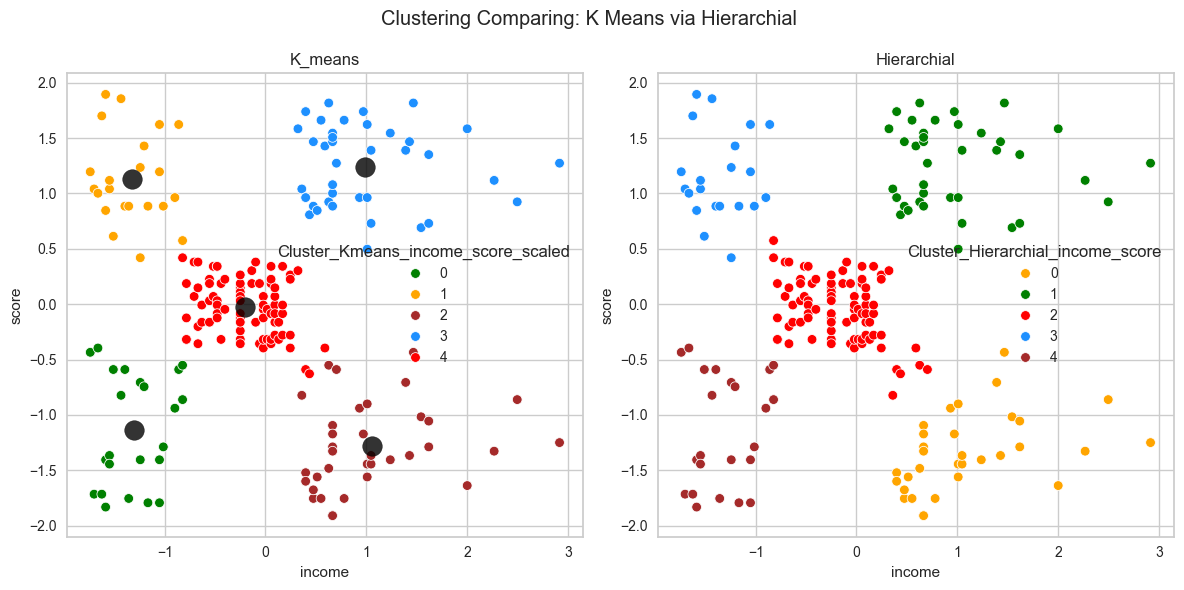

In [124]:
plt.figure(figsize=(12, 6))

plt.suptitle ('Clustering Comparing: K Means via Hierarchial ')
plt.subplot(121)
sns.scatterplot(x='income',
                y='score',
                hue='Cluster_Kmeans_income_score_scaled',
                data=df_cluster_scaled,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
centers = k_means_is_scaled.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8)
plt.title("K_means")

plt.subplot(122)
sns.scatterplot(x='income',
                y='score',
                hue='Cluster_Hierarchial_income_score',
                data=df_cluster_scaled,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Hierarchial")
plt.tight_layout();

In [141]:
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score,Cluster_Hierarchial_age_score,Cluster_Hierarchial_income_score
0,1,Male,19,15,39,2,1,0,4,4
1,2,Male,21,15,81,3,0,1,0,3
2,3,Female,20,16,6,1,5,0,1,4
3,4,Female,23,16,77,3,0,1,0,3
4,5,Female,31,17,40,2,1,0,4,4


In [150]:
df_cluster.iloc[:,1:5].groupby('gender').mean()

,age,income,score
gender,,,
Female,38.098,59.250,51.527
Male,39.807,62.227,48.511


In [152]:
df_cluster.iloc[:,[1,2,3,4,9]].groupby(['gender','Cluster_Hierarchial_income_score']).mean()

age  income  score
gender Cluster_Hierarchial_income_score                      
Female 0                                43.786  93.286 20.643
       1                                32.190  86.048 81.667
       2                                40.510  55.784 48.647
       3                                25.583  24.583 81.833
       4                                43.214  27.357 21.714
Male   0                                38.833  86.389 11.667
       1                                33.278  87.111 82.667
       2                                45.441  55.853 49.853
       3                                25.000  25.778 77.667
       4                                48.333  24.667 19.667

## Conclusion

### Female

**cluster 0** : The average age is around 44, both annula_income is very high but spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.

**cluster 1**: The average age is around 32, the annual income and the spending_score is very high. 
This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 41, the annual income and spending_scores are around on averega. 
It should be researched what can be done to direct more spending.

**cluster 3**: The average age is around 26. Low annual_incomes but very high spending scores. 
This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 43, the annual income and the spending_score are very low. 
 It can be directed to shopping with gift certificates.

### Male

**cluster 0** : The average age is around 39, both annula_income is very high but spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.

**cluster 1**: The average age is around 33, the annual income and the spending_score are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss 

**cluster 2** :The average age is around 46. Both annula_income and spending_scores are very near average. 
It should be researched what can be done to direct more spending.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. 
This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 48, the annual income and the spending_score are very low. 
 It can be directed to shopping with gift certificates.

In [153]:
df_cluster.head()

,id,gender,age,income,score,Cluster_Kmeans_age_score,Cluster_Kmeans_age_score_scaled,Cluster_Kmeans_income_score,Cluster_Hierarchial_age_score,Cluster_Hierarchial_income_score
0,1,Male,19,15,39,2,1,0,4,4
1,2,Male,21,15,81,3,0,1,0,3
2,3,Female,20,16,6,1,5,0,1,4
3,4,Female,23,16,77,3,0,1,0,3
4,5,Female,31,17,40,2,1,0,4,4


In [155]:
df_cluster.iloc[:,2:5].mean()

age      38.850
income   60.560
score    50.200
dtype: float64

In [154]:
df_cluster.iloc[:,[2,3,4,9]].groupby(['Cluster_Hierarchial_income_score']).mean()

,age,income,score
Cluster_Hierarchial_income_score,,,
0,41.000,89.406,15.594
1,32.692,86.538,82.128
2,42.482,55.812,49.129
3,25.333,25.095,80.048
4,45.217,26.304,20.913


**cluster 0** : The average age is around 41, both annula_income is very high and spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.


**cluster 1**: The average age is around 33, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.


**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. 
This group does a lot of shopping, but they do not bring much profit

**cluster 4**: The average age is around 45, both their annual income and their spending_score are very low. 
It can be directed to shopping with gift certificates.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___